## CHECK VERSIONS

In [135]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy as np; print("NumPy", np.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)

Windows-10-10.0.18362-SP0
Python 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
NumPy 1.16.4
SciPy 1.2.1
Scikit-Learn 0.21.2


In [136]:

def OneHotEncode(x,classAmount):
    
    from numpy import argmax
    # integer encode input data
    integer_encoded = list(np.floor(x).astype(int))
    # one hot encode
    onehot_encoded = list()
    for value in integer_encoded:
        temp = [0 for _ in range(classAmount)]
        temp[value] = 1
        onehot_encoded.append(temp)
    return np.array(onehot_encoded)
# invert encoding


## LOAD DATA (TRAINNING)

In [137]:


root ="Dataset/"

datafile = root +"data"+"InSampleMel-Log-TT-24534 A-19 H-35 C-30 V-14-98-40 14-Dec-2019-1812H.npy"
targetfile = root +"target"+"InSampleMel-Log-TT-24534 A-19 H-35 C-30 V-14-98-40 14-Dec-2019-1812H.npy"

InsampleloadTarget = np.load(targetfile) # load
InsampleloadData = np.load(datafile) #

X=InsampleloadData
y=InsampleloadTarget


AAA = list(y).count(0.000)
HHH = list(y).count(1.000)
CCC = list(y).count(2.000)
VVV = list(y).count(3.000)
i=AAA+HHH+CCC+VVV
Aper = int(AAA/i*100)
Hper = int(HHH/i*100)
Cper = int(CCC/i*100)
Vper = int(VVV/i*100)
print(i,"Data")
print(AAA,"samples 0-Ambience ",Aper,"%")
print(HHH,"samples 1-Hatchet ",Hper,"%")
print(CCC,"samples 2-Chainsaw ",Cper,"%")
print(VVV,"samples 3-Vehicle ",Vper,"%")
print ("Final Data Extracted Shape",X.shape)
print ("Final Target Extracted Shape",y.shape)

24534 Data
4878 samples 0-Ambience  19 %
8694 samples 1-Hatchet  35 %
7479 samples 2-Chainsaw  30 %
3483 samples 3-Vehicle  14 %
Final Data Extracted Shape (24534, 98, 40)
Final Target Extracted Shape (24534,)


## LOAD DATA (TESTING)

In [138]:
from sklearn.model_selection import train_test_split
import numpy as np 

root ="C:/Users/Another/CNN/Batch Trainning/Dataset/"

datafile = root +"data"+"NewTrue_Unique-Out-of-SampleMel-Log-TT-7258 A-18 H-36 C-18 V-27-98-40 15-Dec-2019-1044H.npy"
targetfile = root +"target"+"NewTrue_Unique-Out-of-SampleMel-Log-TT-7258 A-18 H-36 C-18 V-27-98-40 15-Dec-2019-1044H.npy"

OutloadTarget = np.load(targetfile) # load
OutloadData = np.load(datafile) #
X_out = OutloadData
y_out = OutloadTarget

XX = OutloadData
yy = OutloadTarget

AAA = list(yy).count(0.000)
HHH = list(yy).count(1.000)
CCC = list(yy).count(2.000)
VVV = list(yy).count(3.000)
i=AAA+HHH+CCC+VVV
Aper = int(AAA/i*100)
Hper = int(HHH/i*100)
Cper = int(CCC/i*100)
Vper = int(VVV/i*100)
print(i,"Data")
print(AAA,"samples 0-Ambience ",Aper,"%")
print(HHH,"samples 1-Hatchet ",Hper,"%")
print(CCC,"samples 2-Chainsaw ",Cper,"%")
print(VVV,"samples 3-Vehicle ",Vper,"%")
print ("Final Data Extracted Shape",XX.shape)
print ("Final Target Extracted Shape",yy.shape)

7258 Data
1330 samples 0-Ambience  18 %
2622 samples 1-Hatchet  36 %
1311 samples 2-Chainsaw  18 %
1995 samples 3-Vehicle  27 %
Final Data Extracted Shape (7258, 98, 40)
Final Target Extracted Shape (7258,)


In [139]:
def flattenFeature(x):
    flats = []
    print(len(x))
    for i in range(len(x)):
        flat = np.ndarray.flatten(x[i,:,:])
        flats.append(flat)
    return np.array(flats)


In [140]:
X = flattenFeature(X)
print('Training Features Shape:', X.shape)

XX = flattenFeature(XX)
print('Testing Features Shape:', XX.shape)

24534
Training Features Shape: (24534, 3920)
7258
Testing Features Shape: (7258, 3920)


In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42, stratify = y)

print(len(X_train))


X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(XX, yy, test_size=0.99, random_state=42, stratify = yy)

print(len(X_test_out))

24288
7186


In [143]:


#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt',random_state=42)

clf.fit(X_train,y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [144]:
from sklearn import metrics

y_pred=clf.predict(X_test_out)
# Model Accuracy, how often is the classifier correct?


print("Accuracy:",metrics.accuracy_score(y_pred, y_test_out))


Accuracy: 0.7182020595602561


## Confusion Matrix

In [145]:

##DECODE BINARY TARGET TO NUMERIC TARGET 0 1 0 0 TO 2###
def decode(datum):
    return np.argmax(datum)


def decodeRows(encoded_data):
    temp = []
    for i in range(encoded_data.shape[0]):
        datum = encoded_data[i]
        #print('index: %d' % i)
        #print('encoded datum: %s' % datum)
        decoded_datum = decode(encoded_data[i])
        temp.append(decoded_datum)
    return np.array(temp)
    #print('decoded datum: %s' % decoded_datum)
    #print()

from sklearn.metrics import roc_auc_score

# Calculate roc auc
Py_pred = clf.predict_proba(X_test_out)
print(Py_pred)
y_testHOT = OneHotEncode(y_test_out,4)
roc_value = roc_auc_score(y_testHOT, Py_pred)

print(roc_value)

[[0.04 0.12 0.47 0.37]
 [0.02 0.03 0.02 0.93]
 [0.   0.04 0.   0.96]
 ...
 [0.51 0.34 0.05 0.1 ]
 [0.   0.97 0.01 0.02]
 [0.   0.06 0.92 0.02]]
0.922765515124532


# Personal Confidence Filter

In [146]:
#PersonalFilter(array (Row x Col)(n x 4 ),Confidence-Class1 ,Confidence-Class2,Confidence-Class3,Confidence-Class4)
#PersonalFilter(probability_prediction,0.5,0.5,0.5,0.5)
def PersonalFilter(ZZ,CONF0,CONF1,CONF2,CONF3):
    for i in ZZ:
        if(i[0] > CONF0):
            i[0] = 1
        else:
            i[0] = 0

    for i in ZZ:
        if(i[1] > CONF1):
            i[1] = 1
        else:
            i[1] = 0

    for i in ZZ:
        if(i[2] > CONF2):
            i[2] = 1
        else:
            i[2] = 0

    for i in ZZ:
        if(i[3] > CONF3):
            i[3] = 1
        else:
            i[3] = 0
    idx = 0
    for i in ZZ:
        if((i == [0,0,0,0]).all()):

            ZZ[idx] = [1,0,0,0]
            #print("Low Conficdence == NULL" , idx)
        idx += 1
    return ZZ

In [163]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    labels= customLabels          
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    ##CUSTOMIZE GRAFTS - BORDERS THICKNESS 0,75 N COLOUR - BLACK
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap="YlGnBu", linewidths=0.75, linecolor='black')
    
    plt.title("Random Forest 100 \n Confidence : A-50% , H-"+str(int(confidence*100)) + "% C-50% , V-50% \nF1:"+str(round(f1,4))+"   PS:"+str(round(ps,4))+"   RS:"+str(round(rs,4)))
    plt.savefig("Random Forest"+str(int(confidence*100)))
    
    plt.show()

F1 Score:  0.7108920846688831
Precision Score:  0.7136723985885127
Recall Score:  0.7203823769779791


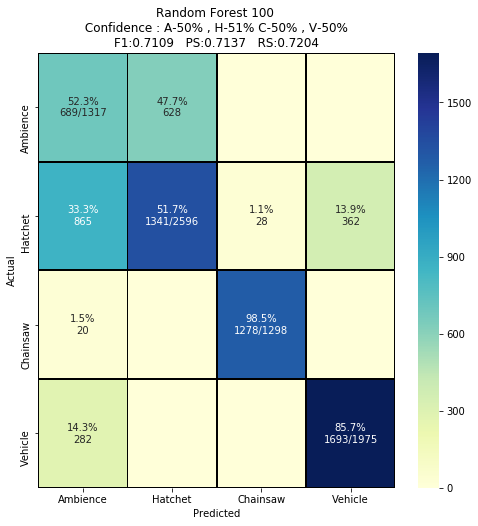

F1 Score:  0.7112544116265824
Precision Score:  0.7144706798583105
Recall Score:  0.7213148319083491


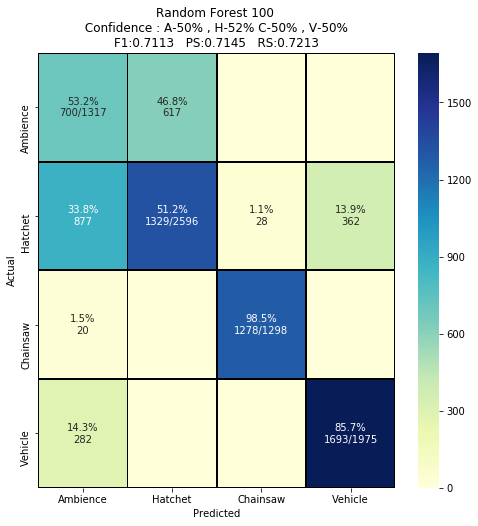

F1 Score:  0.7110654929342606
Precision Score:  0.7147494088419983
Recall Score:  0.7216750321112195


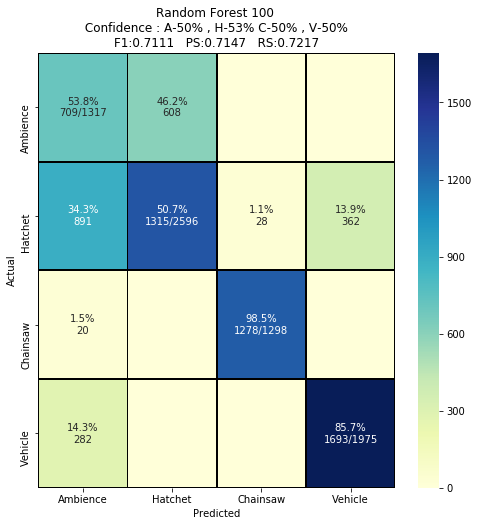

F1 Score:  0.7110894734082853
Precision Score:  0.715367007116785
Recall Score:  0.7224121043899312


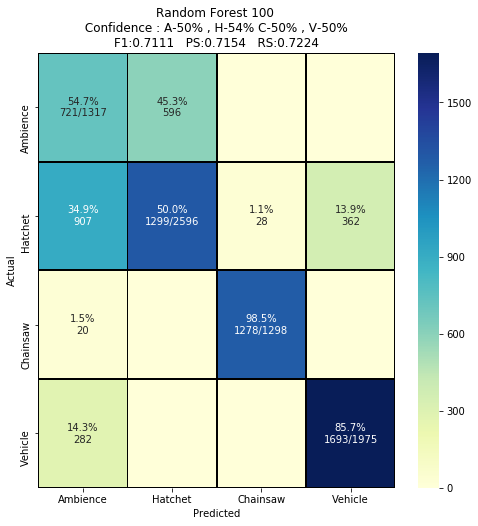

F1 Score:  0.7119986234351801
Precision Score:  0.7167088853787884
Recall Score:  0.723919592693296


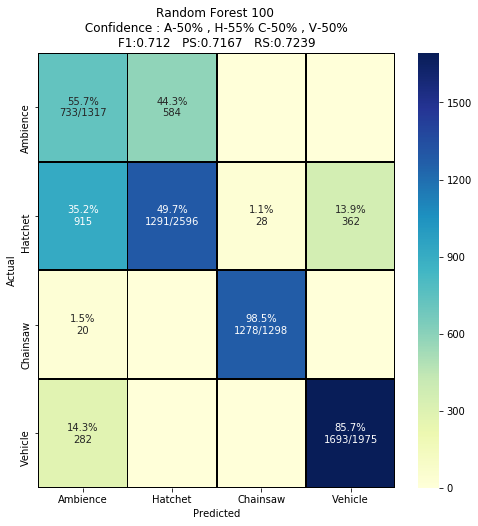

F1 Score:  0.7129761285659877
Precision Score:  0.718621813886344
Recall Score:  0.7260761872087762


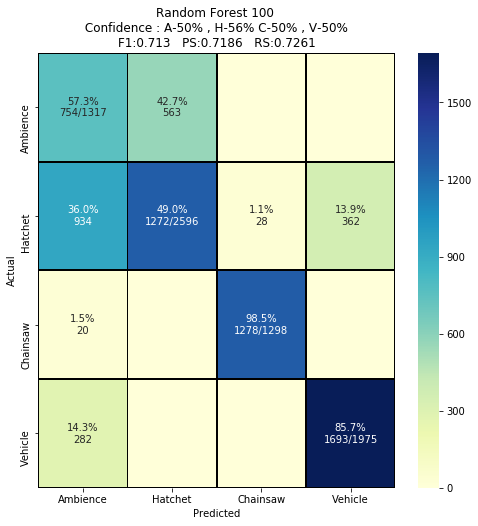

F1 Score:  0.7137043884780074
Precision Score:  0.7200525146851475
Recall Score:  0.7276716415787374


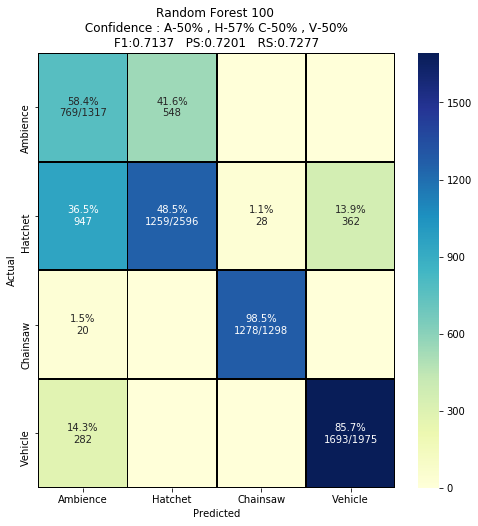

F1 Score:  0.7138780008017267
Precision Score:  0.7209708033335422
Recall Score:  0.7286948412211989


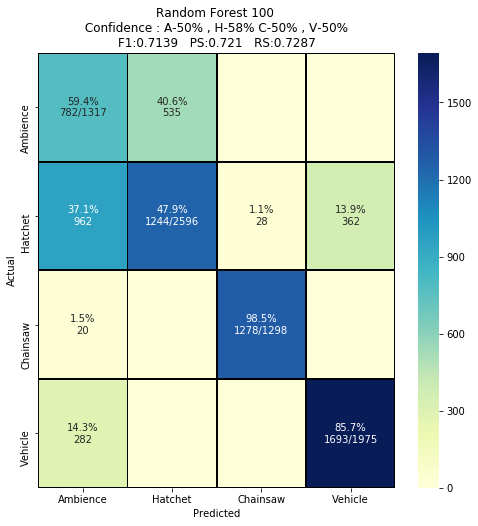

F1 Score:  0.7145170835733596
Precision Score:  0.7225975950964103
Recall Score:  0.7304745636608379


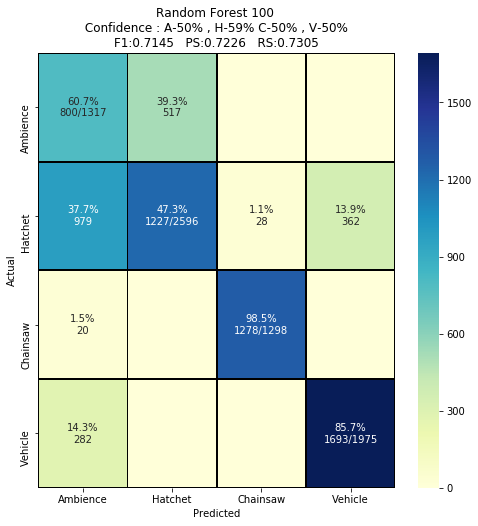

F1 Score:  0.7146966497837759
Precision Score:  0.7234614846382503
Recall Score:  0.731407018591208


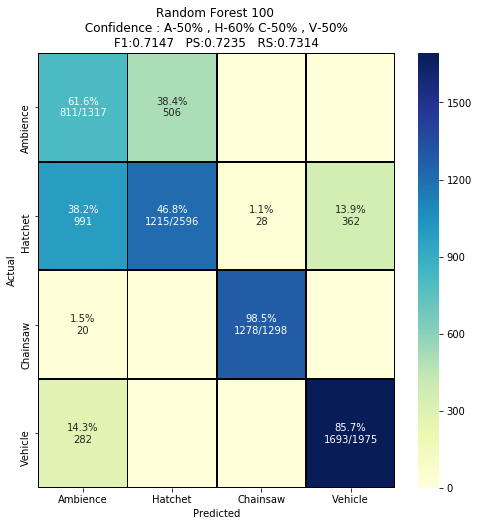

F1 Score:  0.7153843715560582
Precision Score:  0.7252198584498273
Recall Score:  0.7332830430339288


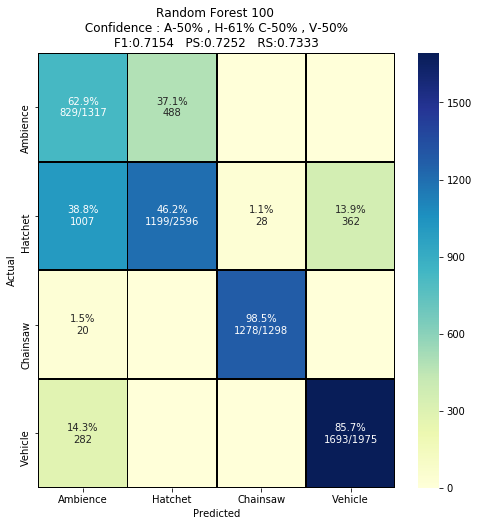

F1 Score:  0.7167166170847994
Precision Score:  0.7278112244190587
Recall Score:  0.7360146709224038


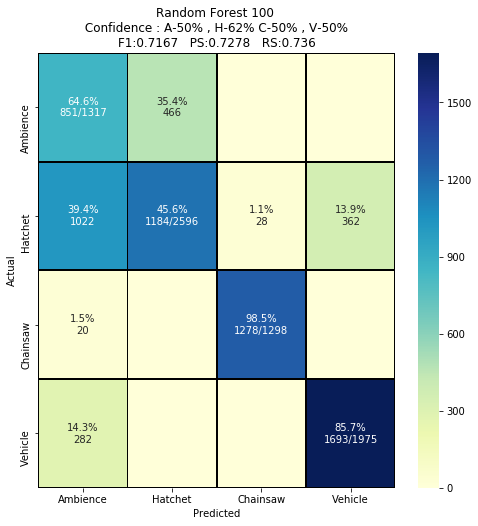

F1 Score:  0.7172184245628055
Precision Score:  0.7296476555274718
Recall Score:  0.7378879167196295


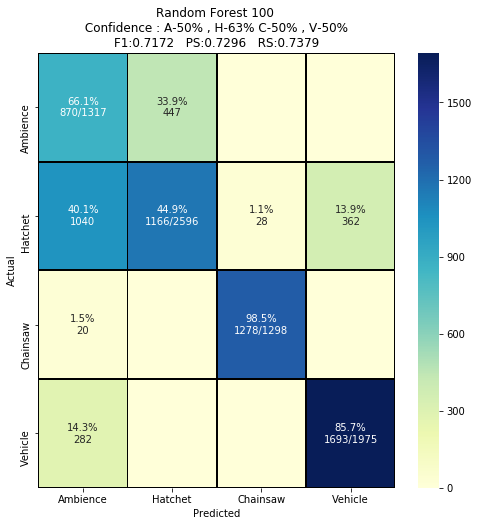

F1 Score:  0.7191293190314134
Precision Score:  0.7331579710259042
Recall Score:  0.7414751480538588


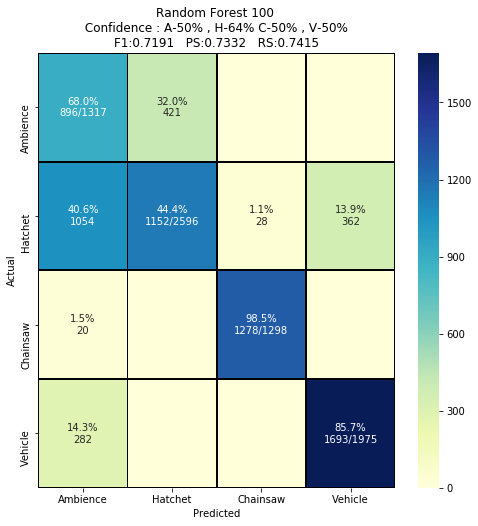

F1 Score:  0.7192050163138941
Precision Score:  0.7343392661575534
Recall Score:  0.742594649699402


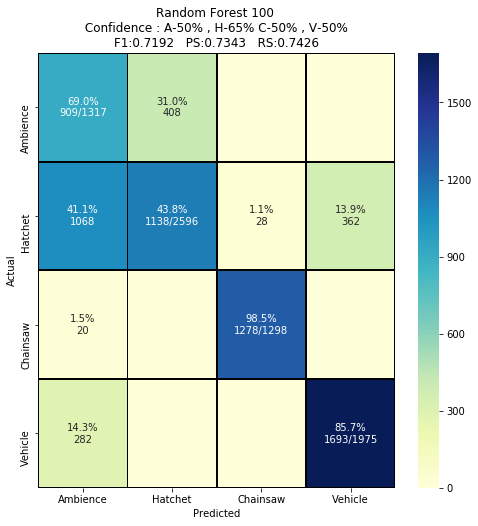

F1 Score:  0.7192189711090387
Precision Score:  0.735246595779578
Recall Score:  0.7434335812721855


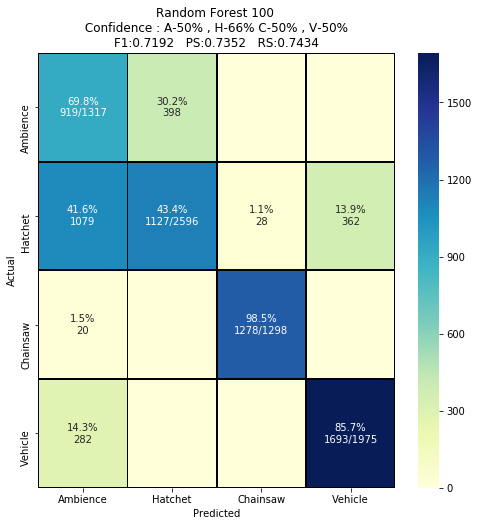

F1 Score:  0.720155470097471
Precision Score:  0.7373864646508308
Recall Score:  0.74550776701206


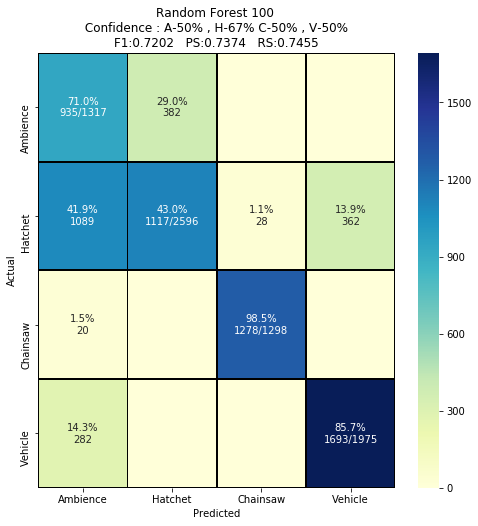

F1 Score:  0.7207905245730557
Precision Score:  0.7390804762075243
Recall Score:  0.7471087786730113


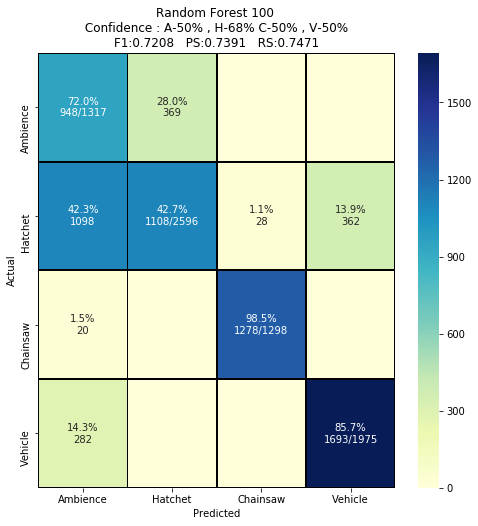

F1 Score:  0.7196214189956498
Precision Score:  0.7391838362733045
Recall Score:  0.7469874688604734


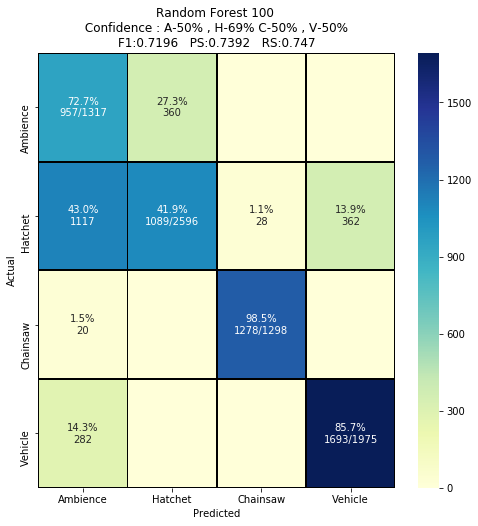

F1 Score:  0.7165385773764716
Precision Score:  0.7381346873889771
Recall Score:  0.7455151523592969


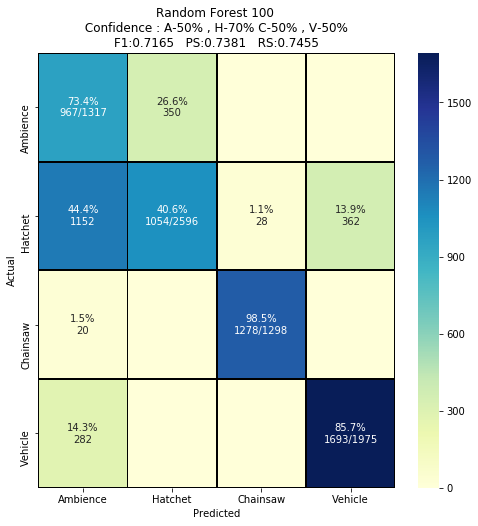

F1 Score:  0.7155810802533584
Precision Score:  0.7390145341160161
Recall Score:  0.746054063340855


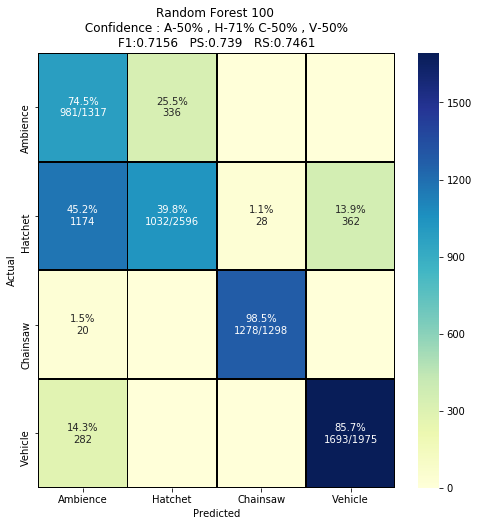

F1 Score:  0.7122587311138602
Precision Score:  0.737816895913826
Recall Score:  0.7443919214790105


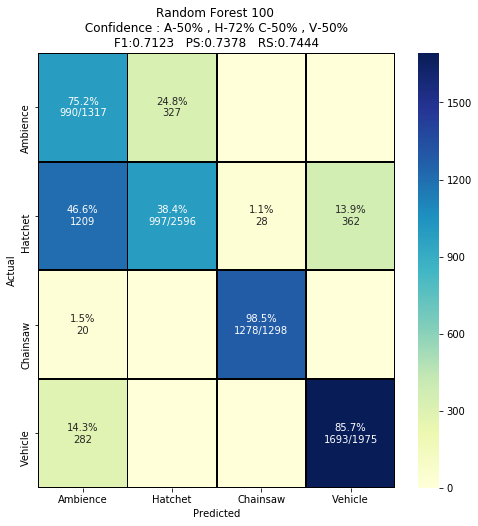

F1 Score:  0.7112142071057841
Precision Score:  0.7385437720807997
Recall Score:  0.7447437857453953


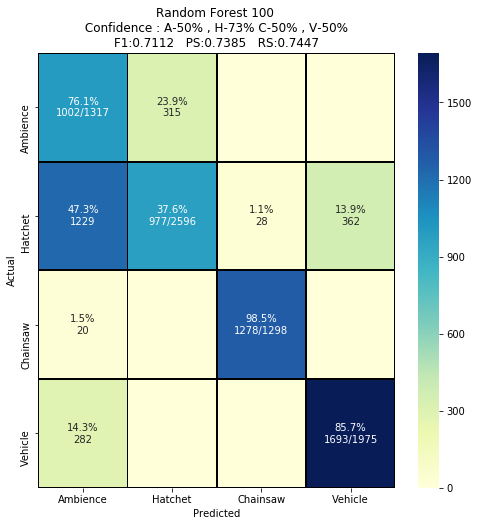

F1 Score:  0.7094803741035043
Precision Score:  0.7388807596297642
Recall Score:  0.7446141399963719


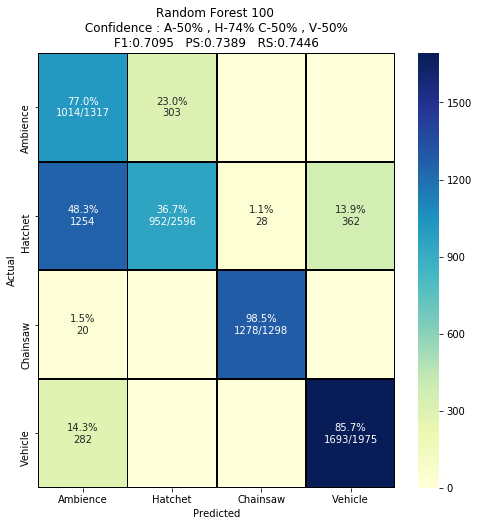

F1 Score:  0.7070380488140688
Precision Score:  0.7388265376977732
Recall Score:  0.7440029842319402


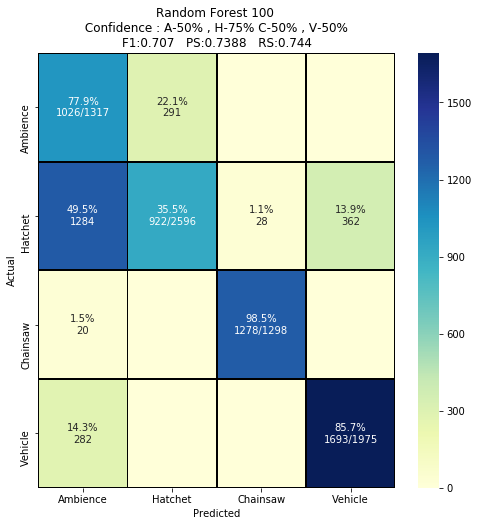

F1 Score:  0.7045827331577461
Precision Score:  0.7381566282839533
Recall Score:  0.742924211679576


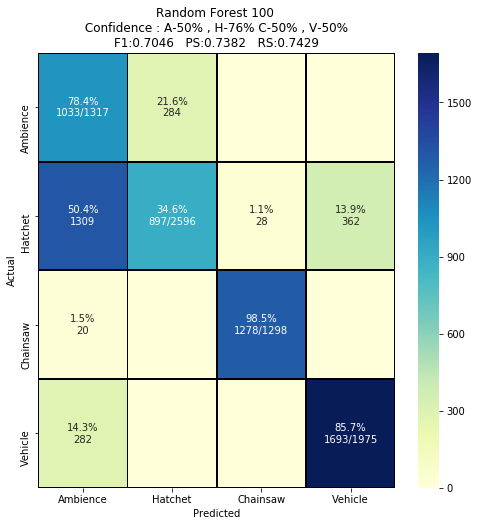

F1 Score:  0.7023384527911913
Precision Score:  0.7379363069799652
Recall Score:  0.7422250898485481


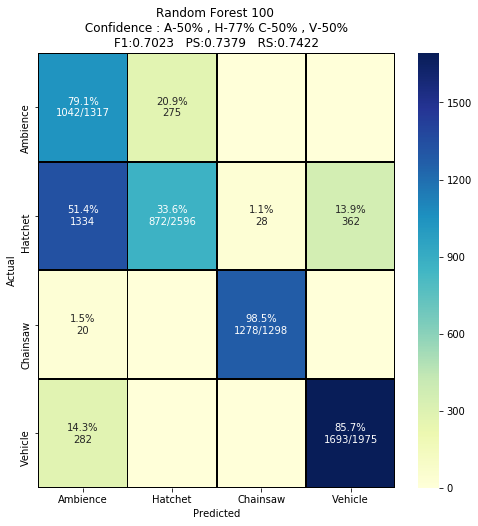

F1 Score:  0.7007066187168375
Precision Score:  0.7384596220925641
Recall Score:  0.7421945247481014


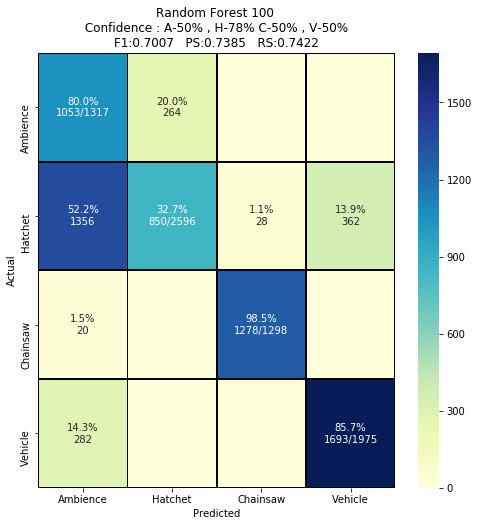

F1 Score:  0.6990353358462966
Precision Score:  0.7390293302834279
Recall Score:  0.7421639596476548


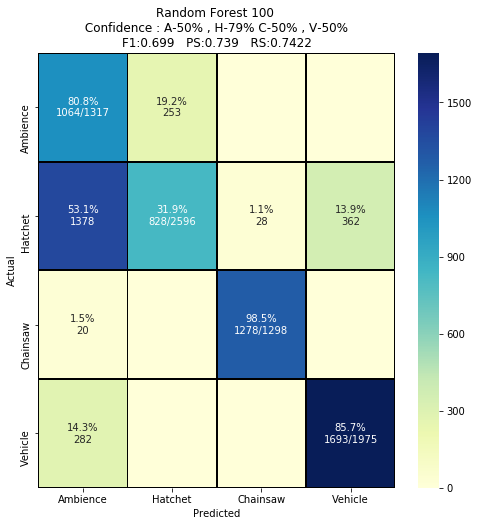

F1 Score:  0.698703635658956
Precision Score:  0.7418350564290892
Recall Score:  0.7439409034417988


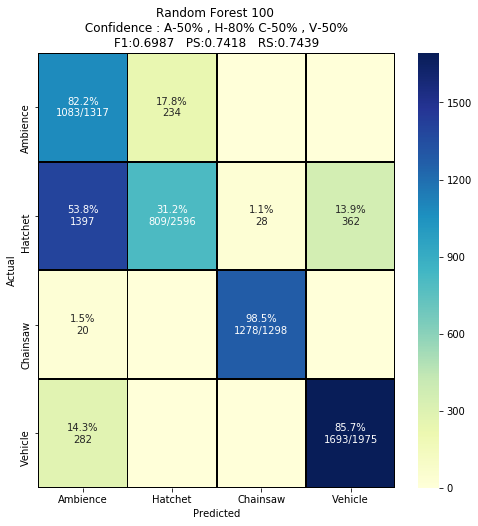

F1 Score:  0.6962002040040114
Precision Score:  0.7424318836269992
Recall Score:  0.7436158750411168


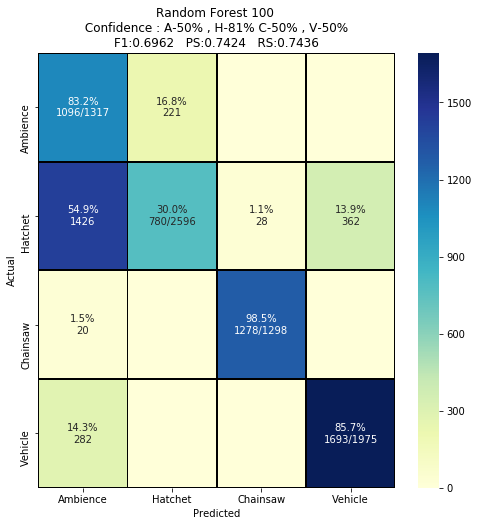

F1 Score:  0.6936434195038466
Precision Score:  0.7440497056569084
Recall Score:  0.7438547654314493


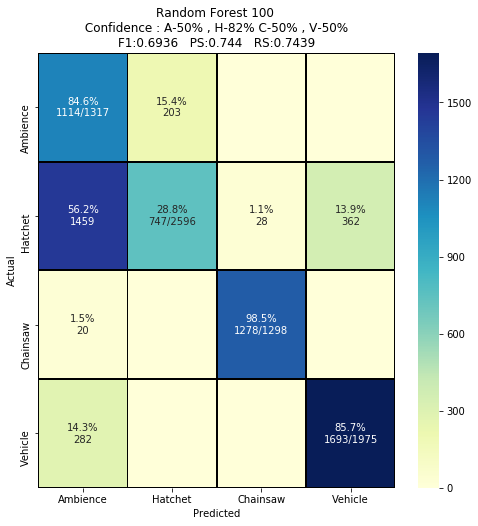

F1 Score:  0.6926355097899639
Precision Score:  0.7464980853389371
Recall Score:  0.744965931140507


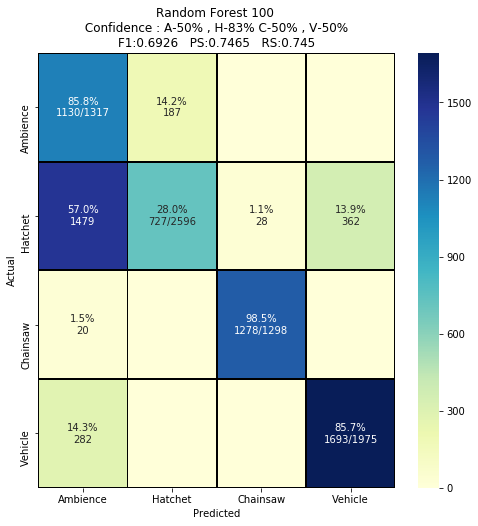

F1 Score:  0.6910136309428354
Precision Score:  0.7516129186647054
Recall Score:  0.7471965984951079


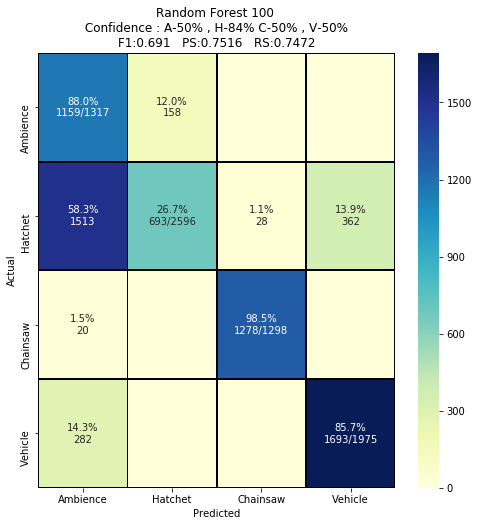

F1 Score:  0.6884115924155394
Precision Score:  0.7564995148874831
Recall Score:  0.7486624071160455


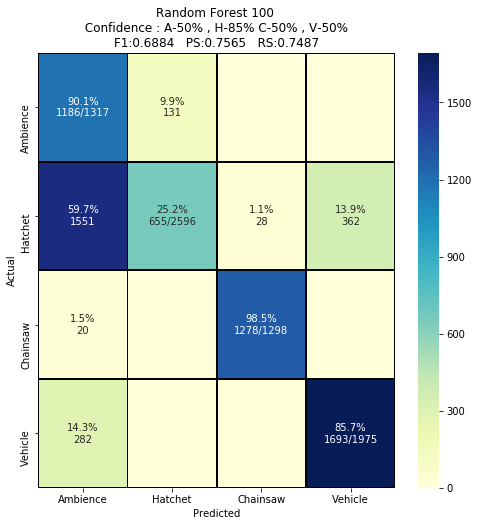

F1 Score:  0.6855427590979328
Precision Score:  0.7607664401441814
Recall Score:  0.7494679949428875


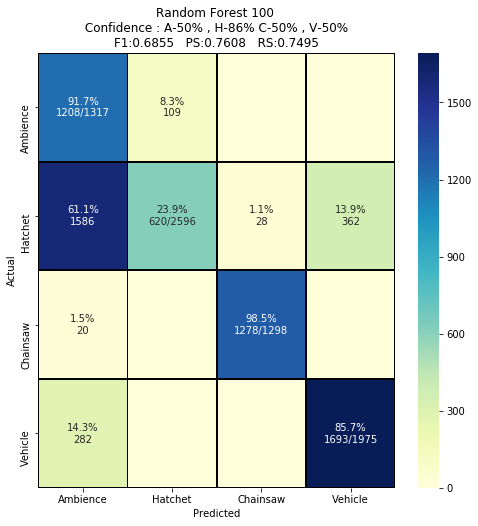

F1 Score:  0.6818913665073838
Precision Score:  0.7644879632342418
Recall Score:  0.7495115026815613


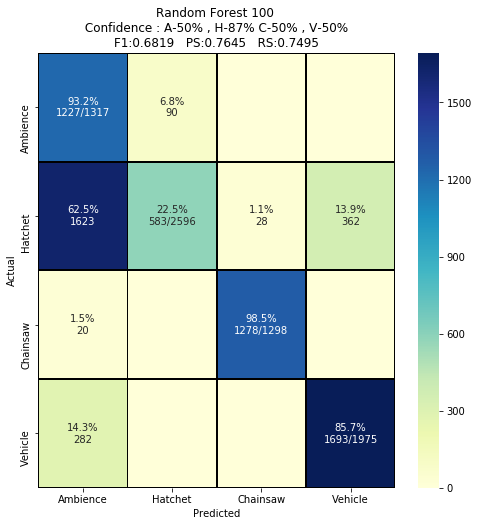

F1 Score:  0.676967391949149
Precision Score:  0.769474069206818
Recall Score:  0.749257768474505


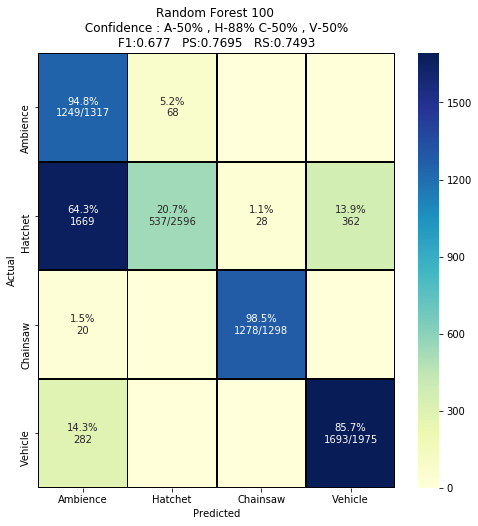

F1 Score:  0.6722691927420907
Precision Score:  0.7739170095669565
Recall Score:  0.7486327194825975


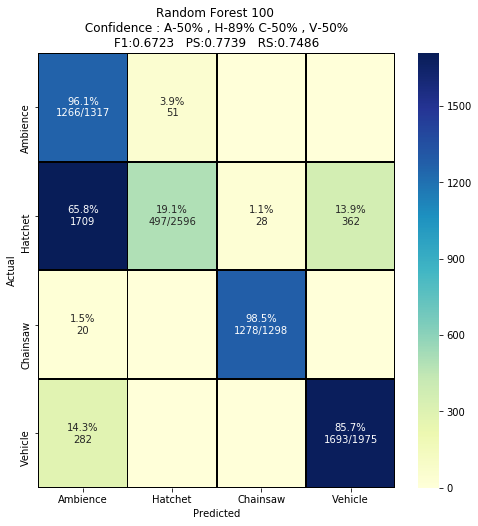

F1 Score:  0.6642220519197788
Precision Score:  0.7792677000560082
Recall Score:  0.7464612811503932


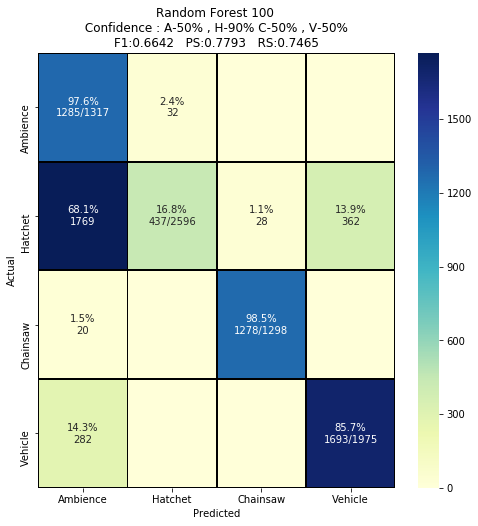

F1 Score:  0.6545265464366126
Precision Score:  0.7799807551148918
Recall Score:  0.7421054618477572


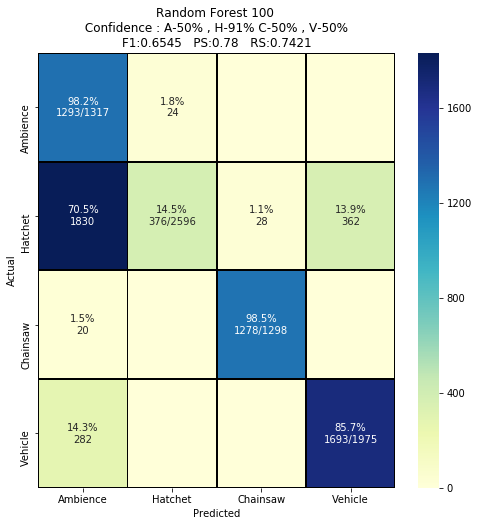

F1 Score:  0.6458268109887223
Precision Score:  0.7842536389670443
Recall Score:  0.7388969306456157


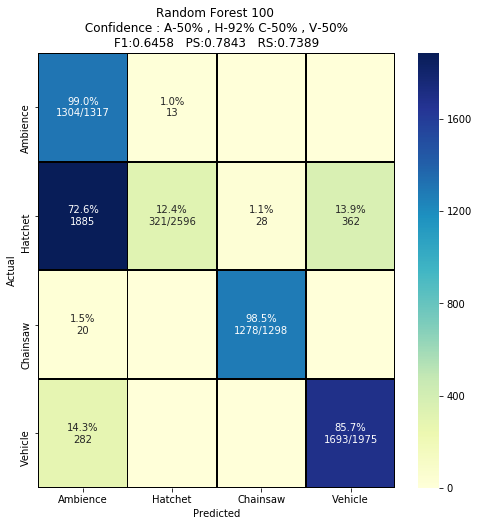

F1 Score:  0.6366034411511736
Precision Score:  0.7855638892378056
Recall Score:  0.7347420512856284


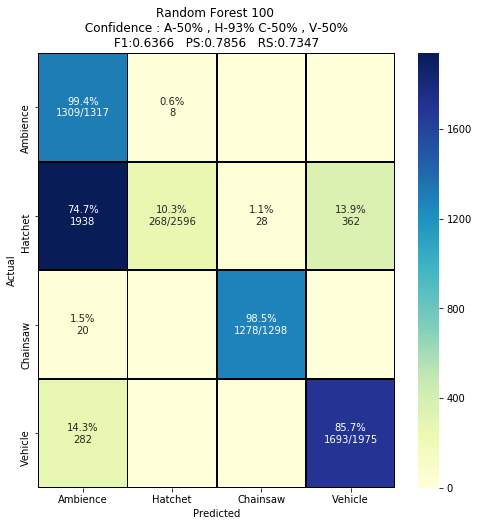

F1 Score:  0.6272771502252488
Precision Score:  0.7860058108445733
Recall Score:  0.7304001252104682


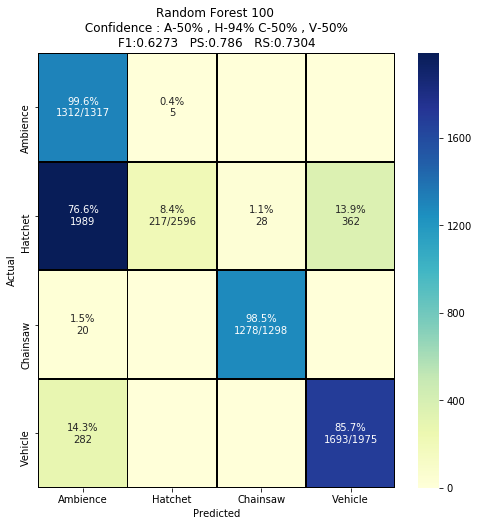

F1 Score:  0.6182469716662298
Precision Score:  0.7876471124672879
Recall Score:  0.7263471051445527


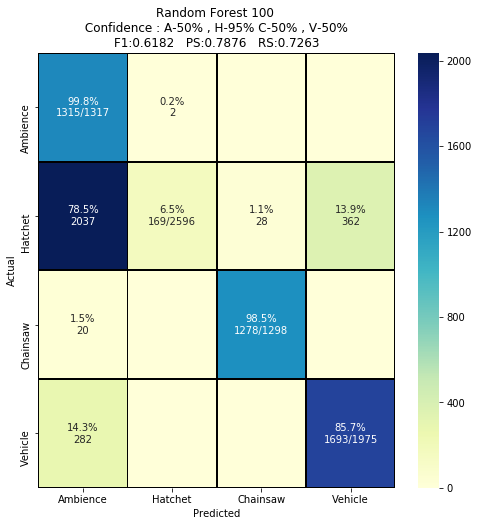

F1 Score:  0.6077651542256652
Precision Score:  0.7871915175254982
Recall Score:  0.7214329243418927


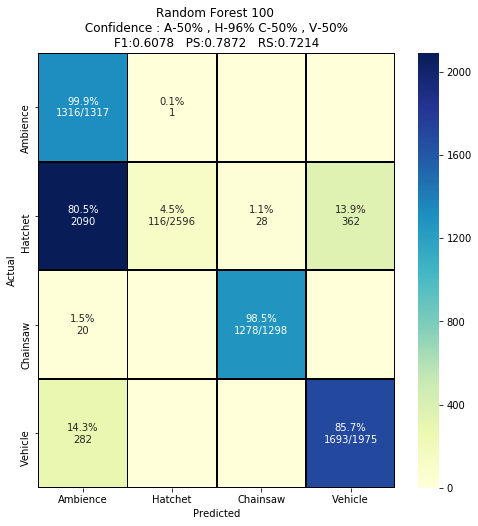

F1 Score:  0.597070984071204
Precision Score:  0.7842550392249423
Recall Score:  0.7164252201816461


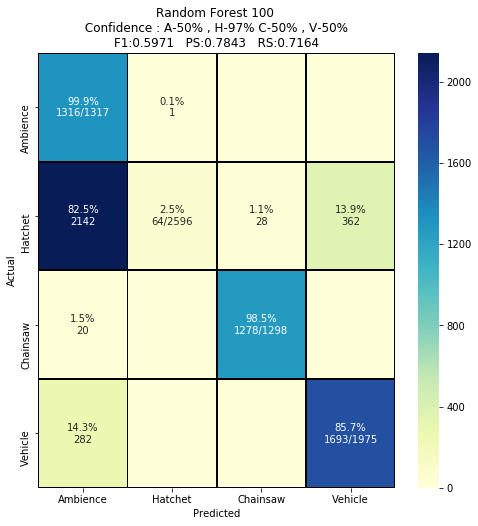

F1 Score:  0.590394583567363
Precision Score:  0.787405833197645
Recall Score:  0.713533381443701


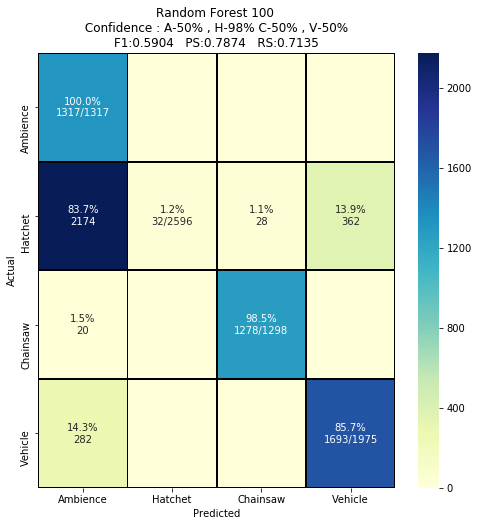

F1 Score:  0.5841562479106406
Precision Score:  0.7867471899313787
Recall Score:  0.7107406233543327


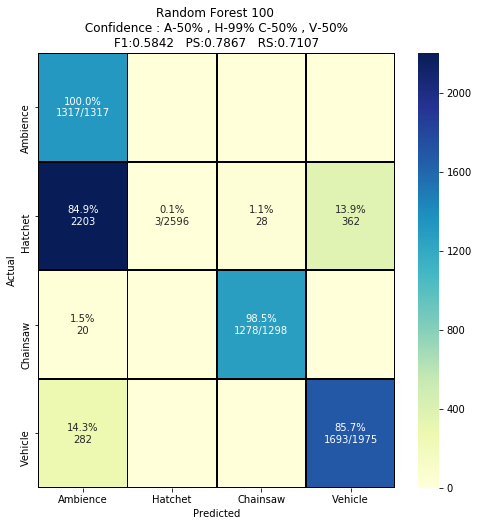

F1 Score:  0.5835043433624381
Precision Score:  0.5366796244436451
Recall Score:  0.7104517173450879


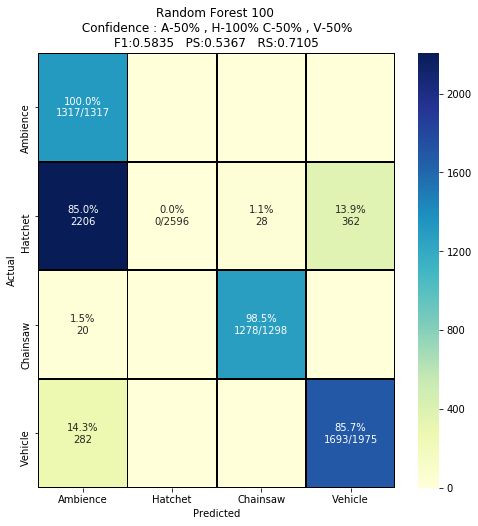

In [262]:
#INITIAL PERSONAL CONFIDENCE THRESHOLD OF CLASSES
#AMBIENCE
confA = 0.5
#HATCHET
confidence = 0.5
#CHAINSAW
confC = 0.5
#VEHICLE
confV = 0.5

#INTERVAL OF INCREMENT FOR CONFIDENCE
step = 0.01


#RECORDING DATA
recIdx = 0;
recconfA = []
recconfidence = []
recconfC = []
recconfV = []
recf1 = []
recps = []
recrs = []



while(confidence < 1.0):
    confidence = confidence+step
    XX = np.array(Py_pred)
    ZZ = PersonalFilter(XX,confA,confidence,confC,confV)  
    rrD = decodeRows(ZZ)
    trueTarget = y_test_out
    from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
    f1 = f1_score(trueTarget, rrD, average="macro")
    ps = precision_score(trueTarget, rrD, average="macro")
    rs = recall_score(trueTarget, rrD, average="macro")
    print("F1 Score: ", f1)
    print("Precision Score: ", ps)
    print("Recall Score: ", rs)     
    customLabels = ['Ambience','Hatchet','Chainsaw','Vehicle']

    cm_analysis(y_test_out, rrD, [0,1,2,3], ymap=None, figsize=(8,8))
    
    #RECORDING DATA
    if(confidence < 1.0):
        recIdx =recIdx + 1
        recconfA.append(confA)
        recconfidence.append(confidence)
        recconfC.append(confC)
        recconfV.append(confV)
        recf1.append(f1)
        recps.append(ps)
        recrs.append(rs)

## Create Table of Thresholding

In [3]:
import pandas as pd
d = {'Model-Name': recconfA, 'Conf-Amb': recconfA,'Conf-Hat': recconfidence, 'Conf-Cha': recconfC,'Conf-Veh': recconfV, 'F1-Score': recf1, 'Precision': recps, 'Recall': recrs }
df = pd.DataFrame(data=d)
df

NameError: name 'recconfA' is not defined

In [1]:

df["F1-Score"].values
print(df.columns)


NameError: name 'recconfA' is not defined

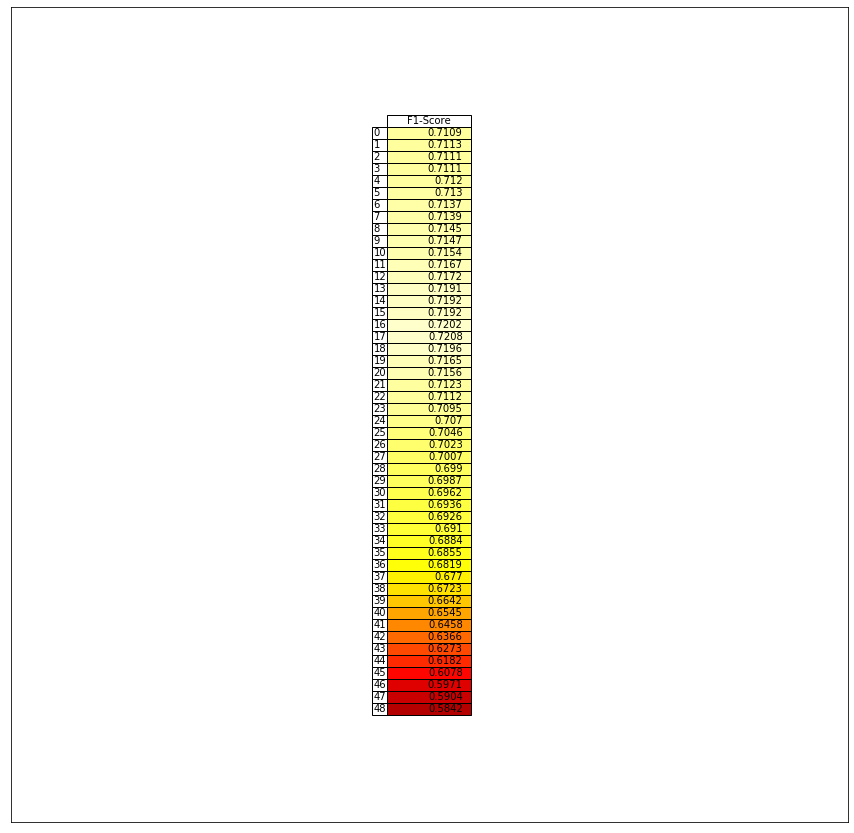

In [286]:
dddf = df[["F1-Score","Precision","Recall"]]
dddf = df[["F1-Score","Precision","Recall"]]
dddf = df[["F1-Score"]]
dddf = df[["F1-Score"]]
#dddf = df[["Precision"]]
#dddf = df[["Conf-Hat"]]
from matplotlib import pyplot as plt
import numpy as np
randn = np.random.randn
from pandas import *

idx = Index(np.arange(1,11))
vals = np.around(dddf.values,4)
norm = plt.Normalize(vals.min()-0.05, vals.max()+0.01)
colours = plt.cm.hot(norm(vals))
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, frameon=True, xticks=[], yticks=[])

the_table=plt.table(cellText=vals, rowLabels=df.index, colLabels=dddf.columns, 
                    colWidths = [0.1]*vals.shape[1], loc='center', 
                    cellColours=colours)

plt.show()

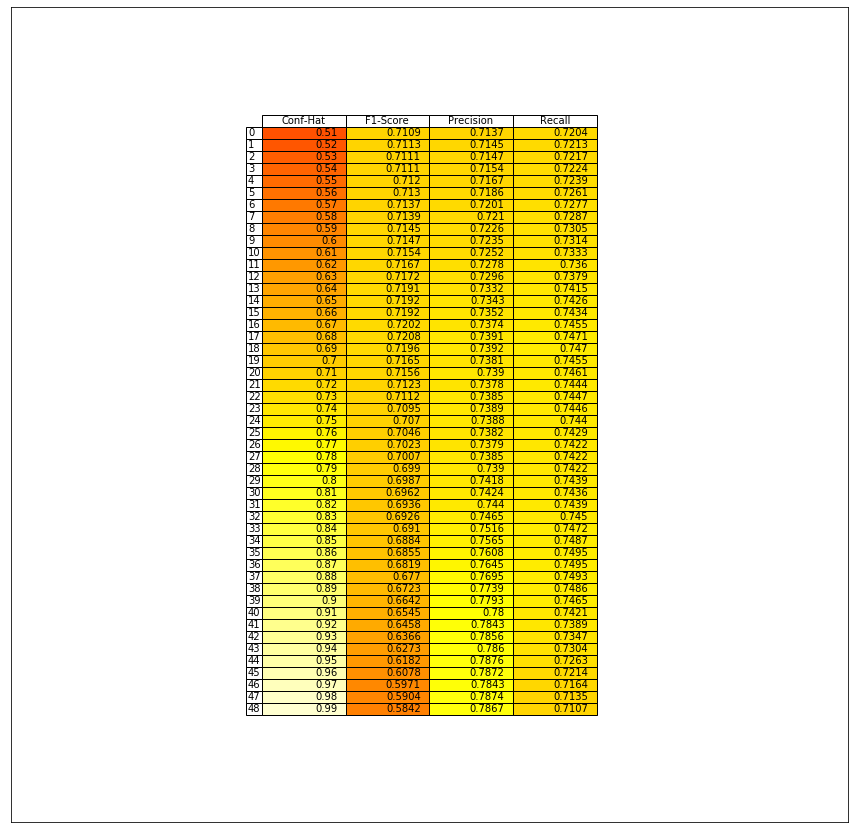

In [278]:
dddf = df[["F1-Score","Precision","Recall"]]
dddf = df[["Conf-Hat","F1-Score","Precision","Recall"]]

#dddf = df[["Conf-Hat"]]
from matplotlib import pyplot as plt
import numpy as np
randn = np.random.randn
from pandas import *

idx = Index(np.arange(1,11))
vals = np.around(dddf.values,4)
norm = plt.Normalize(vals.min()-0.5, vals.max()+0.05)
colours = plt.cm.hot(norm(vals))
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, frameon=True, xticks=[], yticks=[])

the_table=plt.table(cellText=vals, rowLabels=df.index, colLabels=dddf.columns, 
                    colWidths = [0.1]*vals.shape[1], loc='center', 
                    cellColours=colours)

plt.show()

## SAVE MODEL 

In [149]:
import pickle
# save the model to disk
filename = 'RandomForest100-ALLDATA.sav'
pickle.dump(clf, open(filename, 'wb'))



In [150]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
y_pred=clf.predict(X_test)
